# Kelompok 10 - PCD A

- Rionando Soksein Putra - 11221063
- Fanky Wellsy Pongoh - 11221021
- Samuel Benedicto Siahaan - 11221064

# Download Dataset

**Brain Tumor MRI Dataset**  

adalah sebuah dataset yang berisi kumpulan gambar MRI (Magnetic Resonance Imaging) dari otak manusia yang mencakup berbagai kasus tumor otak. Dataset ini biasanya mencakup gambar-gambar yang menunjukkan berbagai jenis tumor otak, serta metadata yang terkait dengan setiap gambar, seperti diagnosis, ukuran tumor, lokasi tumor, dan informasi klinis lainnya.


Alasan pemilihan dataset ini adalah karena dataset Brain Tumor MRI menyediakan data yang sangat relevan dan spesifik untuk penelitian dan pengembangan algoritma dalam bidang pengolahan citra medis, khususnya untuk deteksi dan klasifikasi tumor otak. Dengan menggunakan dataset ini, kelompok kami dapat mengembangkan dan menguji model machine learning atau deep learning yang dapat membantu dalam diagnosis dini dan akurasi deteksi tumor otak, yang pada akhirnya dapat meningkatkan hasil pengobatan dan perawatan pasien. Selain itu, dataset ini juga memungkinkan untuk eksplorasi berbagai teknik pengolahan citra digital, seperti segmentasi, ekstraksi fitur, dan analisis pola, yang semuanya sangat penting dalam bidang medis.

In [1]:
!curl -L -o brain-tumor-mri-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/masoudnickparvar/brain-tumor-mri-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  148M  100  148M    0     0  30.4M      0  0:00:04  0:00:04 --:--:-- 35.7M


In [2]:
!unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

# Import Library

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Image Pre-Processing

Image preprocessing adalah sebuah tahapan untuk memproses semua gambar agar menjadi informasi yang bisa digunakan dengan lebih efektif.

Beberapa hal yang bisa dilakukan adalah dengan melakukan hal-hal seperti  *enhancment*  dan konversi kanal warna. (RGB -> Grayscale maupun sebaliknya)

## Utility Function

In [4]:
"""
Utility function untuk menampilkan gambar berdasarkan path yang diberikan
"""
def show_img(path):
  print(cv.imread(path, cv.IMREAD_GRAYSCALE).shape)
  return plt.imshow(cv.imread(path, cv.IMREAD_GRAYSCALE), cmap='gray')

In [5]:
"""
Utility function untuk mengubah gambar bgr ke grayscale
"""
def bgr_to_graysacle(path):
  img = cv.imread(path)
  img = cv.resize(img, (350, 350))
  B, G, R = img[:, :, 0], img[:, :, 1], img[:, :, 2]

  # Ubah menjadi grayscale dengan rumus luminance
  gray_image = 0.2126 * R + 0.7152 * G + 0.0722 * B

  return gray_image

In [6]:
"""
Utility function untuk menambahkan gaussion noise pada gambar
"""
def add_gaussian_noise(path, mean=0, var=0.04):
    image = cv.imread(path, cv.IMREAD_COLOR_RGB)

    # Ambil ukuran dimensi gambar (baris, kolom, dan channel warna)
    row, col, ch = image.shape

    # Hitung simpangan baku dari varian (sigma = akar dari varian)
    sigma = var ** 0.5

    # Buat noise Gaussian dengan distribusi normal (mean, sigma)
    gauss = np.random.normal(mean, sigma, (row, col, ch))

    # Tambahkan noise ke gambar asli
    noisy = image + gauss

    # Batasi nilai piksel hasil antara 0 dan 255, lalu ubah ke uint8
    return np.clip(noisy, 0, 255).astype(np.uint8)

In [7]:
"""
Utility function untuk menambahkan salt & pepper noise pada gambar
"""
def add_salt_and_pepper_noise(path, salt_vs_pepper=0.05, amount=0.02):
    image = cv.imread(path)
    # Ambil ukuran gambar: baris, kolom, dan channel warna
    row, col, ch = image.shape

    # Salin gambar asli agar tidak merusak data asli
    noisy = np.copy(image)

    # Hitung jumlah pixel yang akan diubah menjadi "salt"
    num_salt = np.ceil(amount * image.size * salt_vs_pepper)

    # Tentukan koordinat acak untuk noise salt pada setiap dimensi gambar
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]

    # Set pixel di koordinat tersebut menjadi 255 putih
    noisy[coords[0], coords[1], :] = 255

    # Hitung jumlah pixel yang akan diubah menjadi "pepper"
    num_pepper = np.ceil(amount * image.size * (1.0 - salt_vs_pepper))

    # Tentukan koordinat acak untuk noise pepper
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]

    # Set pixel di koordinat tersebut menjadi 0 (hitam)
    noisy[coords[0], coords[1], :] = 0

    # Kembalikan gambar yang sudah diberi noise salt and pepper
    return noisy

In [8]:
"""
Utility function untuk menambahkan possion noise pada gambar
"""
def add_poisson_noise(path):
    image = cv.imread(path)

    vals = len(np.unique(image))

    # Cari nilai power of two yang paling dekat
    vals = 2 ** np.ceil(np.log2(vals))

    # Terapkan noise Poisson pada gambar dengan mengalikan dulu gambar dengan 'vals'
    noisy = np.random.poisson(image * vals) / float(vals)

    # Batasi nilai hasil ke rentang [0, 255] dan ubah ke tipe uint8
    return np.clip(noisy, 0, 255).astype(np.uint8)

In [9]:
def brighten_filter(image, beta=50):
    """
    Menerapkan filter terang pada citra.

    Args:
        image: Citra input (NumPy array).
        beta: Nilai penambahan intensitas (integer).

    Returns:
        Citra yang sudah diberi filter terang.
    """
    # Pastikan nilai beta berada dalam rentang yang valid [0, 255]
    beta = max(0, min(beta, 255))

    # Tambahkan nilai beta ke setiap piksel
    brightened_image = cv.add(image, beta)

    return brightened_image

In [10]:
def biner(img):
  citra_biner = np.zeros_like(img)
  h, w = img.shape[:2]
  for y in range(h):
    for x in range(w):
      if img[y, x] < 128:
        citra_biner[y, x] = 0
      else:
        citra_biner[y, x] = 1

  return citra_biner

In [11]:
"""
utility function untuk melakukan konvolusi ke gambar yang dibeirkan,
tipe konvolusi yang tersedia adalah -> Original, Blur (Mean), Gaussian Blur, Sharpen, Edge Detection (Sobel X), Emboss
"""
def apply_conv(img, conv_type):
  kernels = {
    # Kernel "Original" hanya sebagai placeholder, tidak melakukan perubahan (akan digunakan gambar asli).
    'Original': np.array([[0]]),

    # Kernel "Blur (Mean)" untuk meratakan piksel dengan mengambil rata-rata dari 9 piksel sekitarnya (3x3).
    # Digunakan untuk menghaluskan atau mengurangi noise pada citra.
    'Blur (Mean)': np.ones((3, 3), np.float32) / 9,

    # Kernel "Gaussian Blur" menggunakan distribusi Gaussian untuk blur yang lebih halus dan alami.
    # Dibuat dengan mengalikan kernel Gaussian 1D secara baris dan kolom untuk mendapatkan 2D kernel.
    'Gaussian Blur': cv.getGaussianKernel(3, 0) @ cv.getGaussianKernel(3, 0).T,

    # Kernel "Sharpen" meningkatkan kontras dan menonjolkan tepi objek.
    # Piksel tengah bernilai tinggi (5), piksel sekitarnya negatif (-1), hasilnya tampak lebih tajam.
    'Sharpen': np.array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]]),

    # Kernel "Edge Detection (Sobel X)" mendeteksi tepi secara horizontal (vertikal pada gambar).
    # Nilai negatif di kiri dan positif di kanan akan memperlihatkan perbedaan intensitas horizontal.
    'Edge Detection (Sobel X)': np.array([[-1, 0, 1],
                                          [-2, 0, 2],
                                          [-1, 0, 1]]),

    # Kernel "Emboss" memberikan efek timbul atau 3D pada gambar.
    # Menghasilkan bayangan seolah-olah cahaya datang dari arah tertentu.
    'Emboss': np.array([[-2, -1, 0],
                        [-1, 1, 1],
                        [0, 1, 2]])
  }
  if conv_type not in kernels:
        return img

  if conv_type == 'Original':
      return img
  else:
      kernel = kernels[conv_type]
      return cv.filter2D(img, -1, kernel)

In [12]:
"""
Utlity function untuk membuat pipeline dari semua preprocessing pada gambar.
baca gambar -> tambah noise -> grayscale -> apply conv -> binarisasi (opsional) -> return gambar yang sudah diproses
input params,
conv_type = 'Original', 'Blur (Mean)', 'Gaussian Blur', 'Sharpen', 'Edge Detection (Sobel X)', 'Emboss'
noise_kind = snp, poisson, gaussian, none
if snp, config = {amount -> float, salt_vs_pepper: float}
else if gaussian, config = {var -> float, mean: float}
"""
def image_procesing_pipeline(path, noise_kind='snp', config={}, is_binary=True, conv_type='original'):
  image = cv.imread(path)
  image = cv.resize(image, (350, 350))

  if noise_kind == 'snp':
    row, col, ch = image.shape
    amount = config.get('amount', 0.02)
    salt_vs_pepper = config.get('salt_vs_pepper', 0.05)

    # Salin gambar asli agar tidak merusak data asli
    noisy = np.copy(image)

    # Hitung jumlah pixel yang akan diubah menjadi "salt"
    num_salt = np.ceil(amount * image.size * salt_vs_pepper)

    # Tentukan koordinat acak untuk noise salt pada setiap dimensi gambar
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]

    # Set pixel di koordinat tersebut menjadi 255 putih
    noisy[coords[0], coords[1], :] = 255

    # Hitung jumlah pixel yang akan diubah menjadi "pepper"
    num_pepper = np.ceil(amount * image.size * (1.0 - salt_vs_pepper))

    # Tentukan koordinat acak untuk noise pepper
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]

    # Set pixel di koordinat tersebut menjadi 0 (hitam)
    noisy[coords[0], coords[1], :] = 0

    # Kembalikan gambar yang sudah diberi noise salt and pepper
    image = noisy

  elif noise_kind == 'poisson':
    vals = len(np.unique(image))

    # Cari nilai power of two yang paling dekat
    vals = 2 ** np.ceil(np.log2(vals))

    # Terapkan noise Poisson pada gambar dengan mengalikan dulu gambar dengan 'vals'
    noisy = np.random.poisson(image * vals) / float(vals)

    # Batasi nilai hasil ke rentang [0, 255] dan ubah ke tipe uint8
    image = np.clip(noisy, 0, 255).astype(np.uint8)

  elif noise_kind == 'gaussian':
    # Ambil ukuran dimensi gambar (baris, kolom, dan channel warna)
    row, col, ch = image.shape

    var = config.get('var', 0.04)
    mean = config.get('mean', 0)

    # Hitung simpangan baku dari varian (sigma = akar dari varian)
    sigma = var ** 0.5

    # Buat noise Gaussian dengan distribusi normal (mean, sigma)
    gauss = np.random.normal(mean, sigma, (row, col, ch))

    # Tambahkan noise ke gambar asli
    noisy = image + gauss

    # Batasi nilai piksel hasil antara 0 dan 255, lalu ubah ke uint8
    image = np.clip(noisy, 0, 255).astype(np.uint8)

  B, G, R = image[:, :, 0], image[:, :, 1], image[:, :, 2]
  gray_image = (0.2126 * R + 0.7152 * G + 0.0722 * B).astype(np.uint8)

  image = np.array(apply_conv(gray_image, conv_type))

  if is_binary:
    image = biner(gray_image)

  return image

In [13]:
"""
Utility function untuk menampilkan histogram dari gambar yang diberikan
"""
def show_histogram(img, title="Histogram warna gambar"):
    plt.figure(figsize=(6, 4))
    plt.hist(img.flatten(), bins=256, range=[0, 256], color='gray')
    plt.title(title)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

## Preprocessing

In [14]:
cv.imread('Training/glioma/Tr-glTr_0000.jpg').shape, cv.imread('Training/meningioma/Tr-meTr_0000.jpg').shape, cv.imread('Training/notumor/Tr-noTr_0000.jpg').shape, cv.imread('Training/pituitary/Tr-piTr_0000.jpg').shape,

((512, 512, 3), (512, 512, 3), (350, 350, 3), (512, 512, 3))

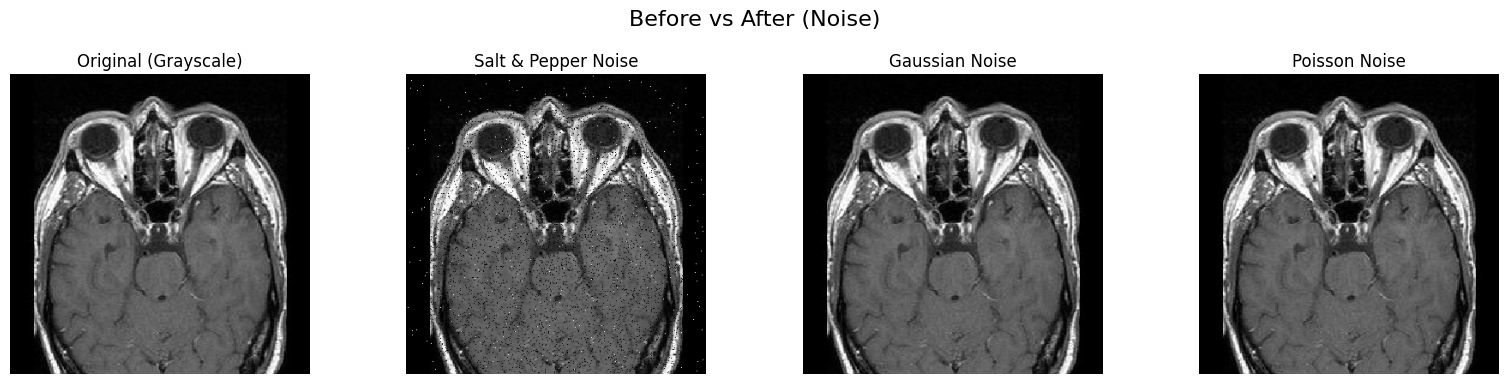

In [15]:
glioma_img = 'Training/glioma/Tr-glTr_0000.jpg'
meningioma_img = 'Training/meningioma/Tr-meTr_0000.jpg'
notumor_img = 'Training/notumor/Tr-noTr_0000.jpg'
pituitary_img = 'Training/pituitary/Tr-piTr_0000.jpg'

plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.imshow(bgr_to_graysacle(notumor_img), cmap='gray')
plt.title('Original (Grayscale)')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(add_salt_and_pepper_noise(notumor_img))
plt.title('Salt & Pepper Noise')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(add_gaussian_noise(notumor_img))
plt.title('Gaussian Noise')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(add_poisson_noise(notumor_img))
plt.title('Poisson Noise')
plt.axis('off')

plt.suptitle('Before vs After (Noise)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Bisa dilihat pada gambar di atas, penambahan noise selain jenis Salt & Pepper noise tidak memberikan pengaruh terlalu banyak terhadap gambar grayscale. Hal ini karena gambar yang memiliki format grayscale akan terpengaruh lumayan besar dengan penambahan salt pada salt & pepper noise.

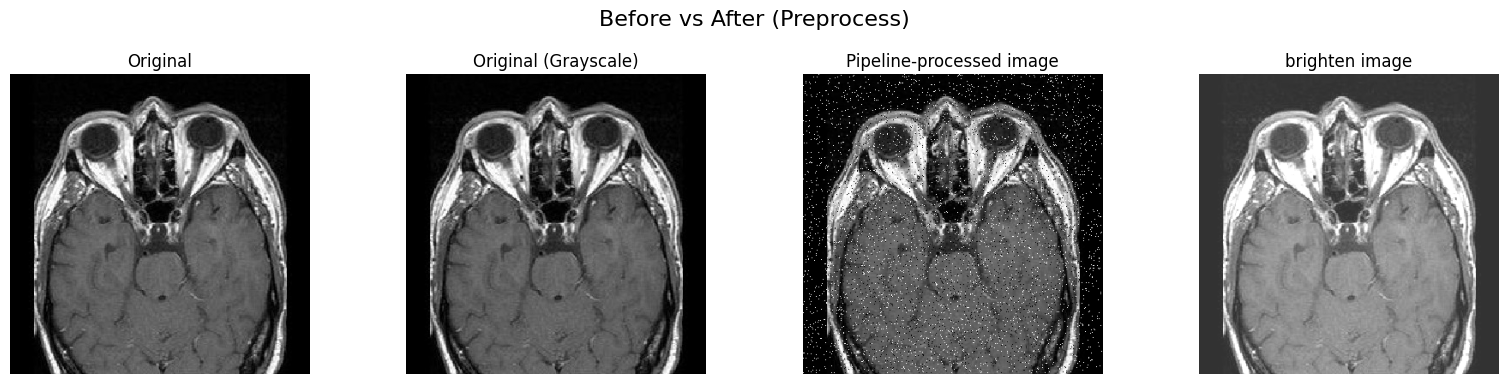

In [16]:
processeed_img = image_procesing_pipeline(notumor_img, noise_kind='snp', config={'amount': 0.02, 'salt_vs_pepper': 0.5}, is_binary=False)
brighten_img = brighten_filter(cv.imread(notumor_img), beta=50)

plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.imshow(cv.imread(notumor_img), cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(bgr_to_graysacle(notumor_img), cmap='gray')
plt.title('Original (Grayscale)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(processeed_img, cmap='gray')
plt.title('Pipeline-processed image')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(brighten_img, cmap='gray')
plt.title('brighten image')
plt.axis('off')

plt.suptitle('Before vs After (Preprocess)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Dari hasil preprocess di atas, bisa dilihat bahwa gambar berhasil berubah saat sudah dilakukan preprocess. Dari hasil di atas, dapat dilihat bahwa sepertinya gambar yang original yang sudah berbentuk grayscale sepertinya lebih baik daripada gambar yang telah diterangkan, hal ini karena saat gambar diterangkan, akan terjadi pengurangan kontras karena warna yang awalnya gelap akan semakin mendekati warna yang sudah putih.

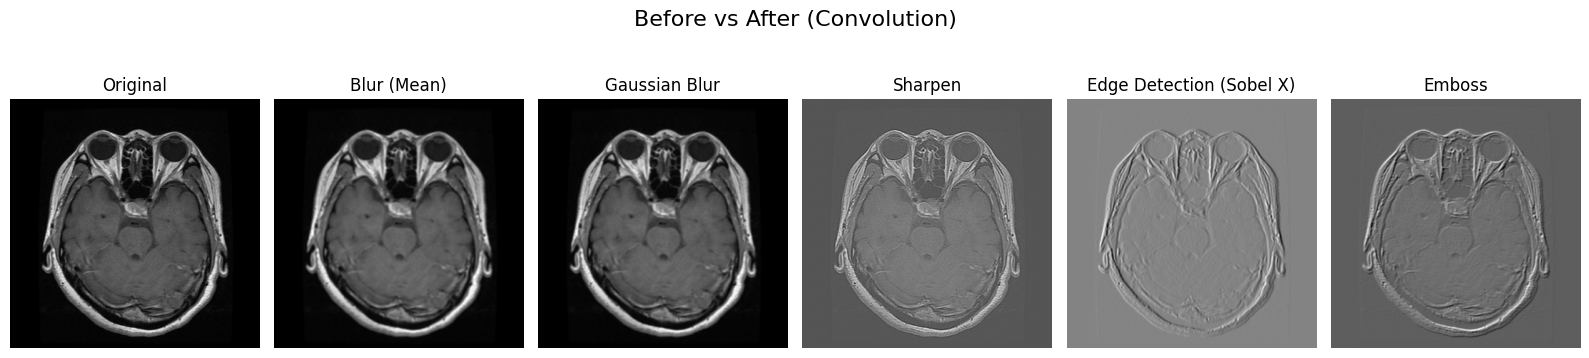

In [17]:
img = bgr_to_graysacle(pituitary_img) # Ubah disini aja nanti gambar yang mau diliat
blur_img = apply_conv(img, 'Blur (Mean)')
gaussian_img = apply_conv(img, 'Gaussian Blur')
sharpen_img = apply_conv(img, 'Sharpen')
edge_img = apply_conv(img, 'Edge Detection (Sobel X)')
emboss_img = apply_conv(img, 'Emboss')

plt.figure(figsize=(16, 4))

plt.subplot(1, 6, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 6, 2)
plt.imshow(blur_img, cmap='gray')
plt.title('Blur (Mean)')
plt.axis('off')

plt.subplot(1, 6, 3)
plt.imshow(gaussian_img, cmap='gray')
plt.title('Gaussian Blur')
plt.axis('off')

plt.subplot(1, 6, 4)
plt.imshow(sharpen_img, cmap='gray')
plt.title('Sharpen')
plt.axis('off')

plt.subplot(1, 6, 5)
plt.imshow(edge_img, cmap='gray')
plt.title('Edge Detection (Sobel X)')
plt.axis('off')

plt.subplot(1, 6, 6)
plt.imshow(emboss_img, cmap='gray')
plt.title('Emboss')
plt.axis('off')

plt.suptitle('Before vs After (Convolution)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Berdasarkan hasil gambar di atas, dapat dilihat bahwa Hasil convolusi edge detection bisa saja menghilangkan banyak fitur fitur penting. Hal yang sama juga terjadi pada convolusi berupa blur, blur sepertinya akan menghilangkan beberapa bagian penting karena efek dari konvolusi blur tersebut. Hal sebaliknya terjadi pada konvolusi sharpen, konvolusi ini mempertahankan edge tanpa mengurangi detail pixel yang lainnya.

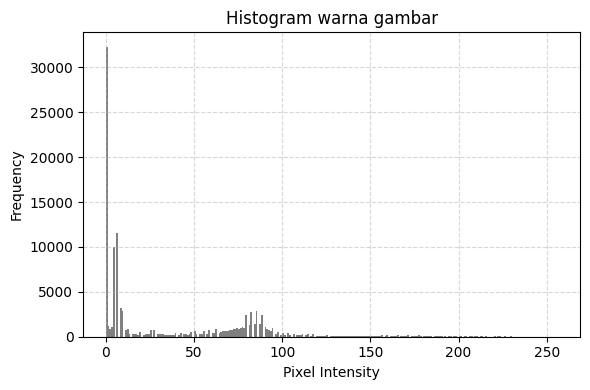

In [18]:
hist_normal = show_histogram(img) # Ubah disini gambar yang mau diliat warnanya (harus grayscale)

Sehingga, dari hasil analisis di atas, pipeline preprocess yang akan diguankan adalah  
```
Raw Image -> Grayscale -> Sharpen -> Noise -> Processed Image
```

In [19]:
"""
function untuk membuat pipeline yang berfungsi untuk memproses gambar mri.
baca gambar -> tambah noise -> grayscale -> apply conv -> binarisasi (opsional) -> return gambar yang sudah diproses
input params,
conv_type = 'Original', 'Blur (Mean)', 'Gaussian Blur', 'Sharpen', 'Edge Detection (Sobel X)', 'Emboss'
config = {amount -> float, salt_vs_pepper: float}
noise = True, False -> to add noise or not
"""
def image_procesing_pipeline(path, config={}, conv_type='sharpen', noise=False):
  image = cv.imread(path)

  # reize agar ukran gambar sama
  image = cv.resize(image, (350, 350))

  # convert ke grayscale
  B, G, R = image[:, :, 0], image[:, :, 1], image[:, :, 2]
  gray_image = (0.2126 * R + 0.7152 * G + 0.0722 * B).astype(np.uint8)

  # apply konvolusi (sharpen untuk defaultnya)
  image = np.array(apply_conv(gray_image, conv_type))

  # tambah noise
  if noise:
    row, col = image.shape
    amount = config.get('amount', 0.02)
    salt_vs_pepper = config.get('salt_vs_pepper', 0.05)

    # Salin gambar asli agar tidak merusak data asli
    noisy = np.copy(image)

    # Hitung jumlah pixel yang akan diubah menjadi "salt"
    num_salt = np.ceil(amount * image.size * salt_vs_pepper)

    # Tentukan koordinat acak untuk noise salt pada setiap dimensi gambar
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]

    # Set pixel di koordinat tersebut menjadi 255 putih
    noisy[coords[0], coords[1]] = 255

    # Hitung jumlah pixel yang akan diubah menjadi "pepper"
    num_pepper = np.ceil(amount * image.size * (1.0 - salt_vs_pepper))

    # Tentukan koordinat acak untuk noise pepper
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]

    # Set pixel di koordinat tersebut menjadi 0 (hitam)
    noisy[coords[0], coords[1]] = 0

    # Kembalikan gambar yang sudah diberi noise salt and pepper
    image = noisy

  return image

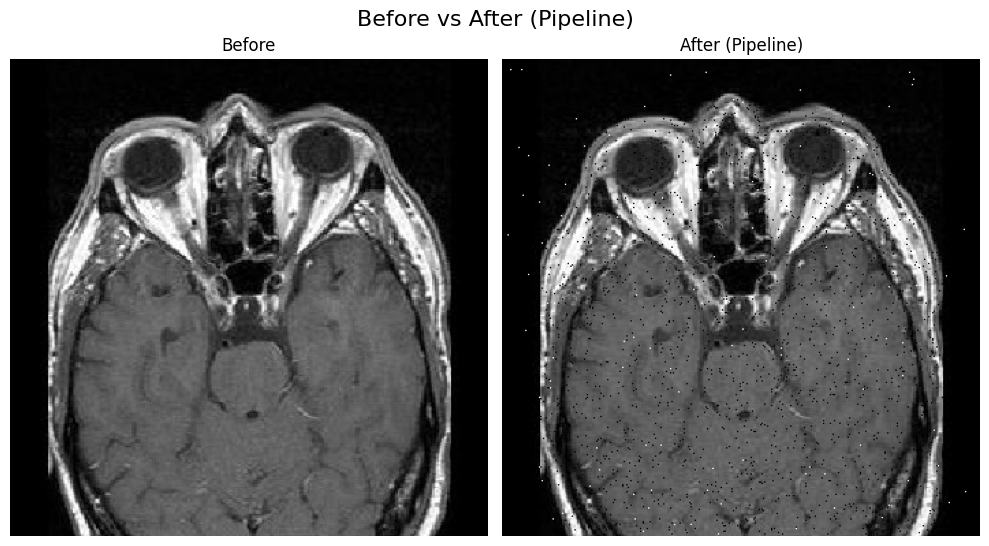

In [20]:
processed_img = image_procesing_pipeline(notumor_img, noise=True)
original = cv.imread(notumor_img)

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.title('Before')
plt.imshow(original, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('After (Pipeline)')
plt.imshow(processed_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.suptitle('Before vs After (Pipeline)', fontsize=16)
plt.show()


# Model Machine Learning

## Utility Function

In [21]:
import os
# conv_type = 'Original', 'Blur (Mean)', 'Gaussian Blur', 'Sharpen', 'Edge Detection (Sobel X)', 'Emboss'
def load_images_from_folder(folder_path, is_test=False):
    images = []
    labels = []
    classes = sorted(os.listdir(folder_path))
    class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}

    for class_name in classes:
        class_folder = os.path.join(folder_path, class_name)
        if not os.path.isdir(class_folder):
            continue

        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                continue

            processed_img = None

            if is_test:
              # jangan kasih noise kalo ini data untuk tset
              processed_img = image_procesing_pipeline(img_path, noise=False)
            else:
              processed_img = image_procesing_pipeline(img_path, noise=True)

            images.append(processed_img.flatten())
            labels.append(class_name)

    return np.array(images), np.array(labels)

## Feature and label preprocessing

In [22]:
train_folder = "Training"
test_folder = "Testing"

# tidak ada konvolusi yang diberikan
X_train, y_train = load_images_from_folder(train_folder, is_test=False)
X_test, y_test = load_images_from_folder(test_folder, is_test=True)

In [23]:
len(X_train), len(y_train), len(X_test), len(y_test)

(5712, 5712, 1311, 1311)

In [24]:
X_train.shape

(5712, 122500)

In [25]:
values, counts = np.unique(y_train, return_counts=True)

print(values)
print(counts)

['glioma' 'meningioma' 'notumor' 'pituitary']
[1321 1339 1595 1457]


## Model Training and Testing

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [30]:
rfc = RandomForestClassifier()

In [31]:
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9176201372997712

## Save the model

In [32]:
import pickle

with open('rfc.pkl', 'wb') as f:
    pickle.dump(rfc, f)